# **Employee Sentiment & Engagement Analysis**

## **1️⃣ Project Overview**
This project involves analyzing an **unlabeled dataset** of employee messages to assess **sentiment and engagement**.  
The workflow follows **Natural Language Processing (NLP) and statistical analysis techniques** to extract meaningful insights.  

### **Deliverables:**
✔ **Well-documented codebase**.
✔ **Comprehensive report of findings**.
✔ **Insightful visualizations**.
✔ **Summary of key trends & patterns**.

---

## **2️⃣ Project Objective**
The main goal is to **evaluate employee sentiment** and **engagement trends** through structured analysis.

### **Key Tasks:**
1️⃣ **Sentiment Labeling**  
✔ Automatically categorize each message as **Positive, Negative, or Neutral**.  

2️⃣ **Exploratory Data Analysis (EDA)**  
✔ Analyze and visualize **message trends** to understand data structure.  

3️⃣ **Employee Score Calculation**  
✔ Compute a **monthly sentiment score** per employee.  

4️⃣ **Employee Ranking**  
✔ Rank employees **based on sentiment scores** to identify engagement levels.  

5️⃣ **Flight Risk Identification**  
✔ Detect employees **sending 4 or more negative emails** in a rolling 30-day window.  

6️⃣ **Predictive Modeling**  
✔ Develop a **linear regression model** to forecast **future sentiment trends**.  

---

### **Key Takeaways ✅**
✔ **Sentiment analysis helps assess engagement & morale**.
✔ **Rankings reveal workplace trends & potential risks**.
✔ **Predictive modeling ensures proactive sentiment tracking**.

# Task 1: Sentiment Labeling

## Objective
Label each employee message with one of three sentiment categories: **Positive**, **Negative**, or **Neutral**.

## Requirements
- Work with the provided `test.csv` dataset.
- Preferably use a **large language model (LLM)** or any suitable **NLP technique** to determine the sentiment of each message.
- Augment the dataset with an additional column indicating the **sentiment label** for each message.
- Document your chosen **approach for labeling**.

## Notes
Ensure that the **labeling criteria** are clearly justified and reproducible.


In [ ]:
import pandas as pd

#Load dataset
df = pd.read_csv("test(in).csv", encoding="utf-8")

#Details of dataset
print(df.head())
print()
print(df.info())
print()

#checking for missing values
print(df.isnull().sum())
print()

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@enron.com  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Colu

# **Text Cleaning & Vectorization for Sentiment Analysis**

## **1️⃣  Clean Text**
Before applying NLP techniques, it's essential to **normalize and clean** text data to:
- **Remove unnecessary characters** (special symbols, punctuation) that don’t contribute to sentiment).
- **Reduce noise** for better model accuracy.
- **Ensure consistency** in word representation, improving tokenization efficiency.

---

## **2️⃣ Use `if` Condition to Check Column**
When working with data, we must ensure the required column exists before processing:
- **Avoid KeyErrors** if the column name differs or is missing.
- **Improve robustness**—graceful handling of unexpected data structures.

🔹 This prevents execution failures and provides a meaningful error message instead.

---

## **3️⃣ Use TF-IDF Vectorization**
Text data cannot be directly used for machine learning models; **vectorization** transforms text into numerical features:

- **TF-IDF (Term Frequency-Inverse Document Frequency)** is a statistical method that:
  - Assigns **higher importance** to rare words (*useful for sentiment analysis*).
  - Reduces weight of common words (*e.g., "the", "is"*) which don’t hold meaningful sentiment.
  - Ensures **standardized input** for machine learning models.

---

### **Key Takeaways** ✅  
✔ **Text Cleaning** ensures consistency for NLP processing.  
✔ **Column Check (`if`)** avoids runtime errors and improves robustness.  
✔ **TF-IDF Vectorization** converts text into numerical features for model training.

By following these steps, we ensure **efficient preprocessing and structured workflows** for AI-driven sentiment classification!


In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

#Function to clean text(removing special characters, extra spaces)
def clean_text(text):
    text = re.sub(r"\W", " ", text) #Remove special characters
    text = re.sub(r"\s+", " ", text) #Remove spaces
    return text.strip()

if "body" in df.columns:
    df["cleaned_text"] = df["body"].apply(clean_text)
else:
    print("Error: 'body' column not found!")

#TF-IDF Vectorization
vectorize = TfidfVectorizer(max_features=5000, stop_words="english")
X = vectorize.fit_transform(df["cleaned_text"])

# **GPU-Accelerated Sentiment Analysis Using Transformers**

## **1️⃣ Use `torch.cuda.is_available()`**
Before running NLP models, we check if a **GPU** is available for faster computations.  
- If a GPU is **detected**, we use `device=0` (the first available GPU).  
- Otherwise, we fall back to **CPU mode** (`device=-1`).

---
## **2️⃣ Use transformers.pipeline()**
The transformers library provides pretrained models, eliminating the need for manual training.

- Pipeline for Sentiment Analysis automatically loads the **model**, optimized for sentiment classification.

- Using GPU (device=0) significantly speeds up processing.

---
## **3️⃣ Apply Sentiment Analysis to the DataFrame**
Each row in the dataset contains a text message (stored in the "body" column).

- We apply sentiment classification to each message.

- The model outputs labels (POSITIVE, NEGATIVE, NEUTRAL).

---
## **Key Benefits of This Approach** ✅
✔ **Leverages Pretrained LLMs** —no need for manual text vectorization.

✔ **Uses GPU for acceleration**, making inference much faster.

✔ **Handles complex language nuances**, outperforming rule-based models.

In [ ]:
import torch
import warnings
from transformers import pipeline
from transformers.utils import logging
logging.set_verbosity_error()


# Set device to GPU (if available)
device = 0 if torch.cuda.is_available() else -1  # -1 for CPU

# Load pretrained sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=device)

# Apply sentiment analysis
df["sentiment_label"] = df["body"].apply(lambda text: sentiment_pipeline(text)[0]["label"])

#hide warnings
warnings.filterwarnings("ignore")

**About the warning, if your ipywidgets library is not updated won't show a progress bar that shows the progress of the sentiment analysis process. Try with colab, generally its has tools setup for each and every task related to machine learning.**

# **Saving Sentiment-Labeled Data**

Once sentiment analysis is complete, we need to **store the results** for further analysis, reporting, or model evaluation.  
- **Ensures reproducibility**—allows future usage without reprocessing.  
- **Facilitates visualization & employee ranking** (next steps in the project).  
- **Creates a clean dataset** that includes the new `sentiment_label` column.

In [ ]:
# Save the updated dataframe with sentiment labels
df.to_csv("labeled_test.csv", index=False)

print("Sentiment labels have been successfully appended and saved as 'labeled_test.csv'.")

Sentiment labels have been successfully appended and saved as 'labeled_test.csv'.


# **Task 2: Exploratory Data Analysis (EDA)**

## **Objective**
Understand the **structure, distribution, and trends** in the dataset through thorough exploration.

## **Requirements**
-  **Examine the overall data structure** (e.g., number of records, data types, missing values).
-  **Investigate the distribution** of sentiment labels across the dataset.
-  **Analyze trends over time** to detect shifts in sentiment.
-  **Explore additional patterns or anomalies** that could provide insights into **employee engagement**.
-  **Prepare visualizations** (charts, graphs, tables) to effectively communicate findings.

## **Notes**
- The EDA should provide a **solid foundation for later tasks**, ensuring key insights and areas for further analysis are well-documented.
- The findings should **help shape subsequent modeling, reporting, or business decisions**.

---


# **Loading and Inspecting the Dataset**

## **1️⃣ Load the Dataset**
Before performing analysis, we need to read the dataset from the updated CSV file.

---

## **2️⃣ Overview of Dataset Structure**
Check Column Types and Missing Values
To understand the dataset, inspect column types and look for null values.

---

## **3️⃣ Summary Statistics**
Generating summary statistics for numerical columns provides insight into data distribution.

---

## **4️⃣ First Few Records**
Viewing a few records helps confirm that the dataset loaded correctly and provides an initial look at the structure.

---

**Key Takeaways** ✅

✔ **Dataset successfully loaded** for further analysis.

 ✔ **Examined structure, missing values, and column types** for cleaning.

 ✔ **Summary statistics help understand data distribution** before visualization.

In [ ]:
# Load dataset and check structure
import pandas as pd

df = pd.read_csv("labeled_test.csv")

# Overview of dataset
print(df.info())  # Check column types and missing values
print(df.describe())  # Summary statistics
print(df.head())  # Inspect first few records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Subject          2191 non-null   object
 1   body             2191 non-null   object
 2   date             2191 non-null   object
 3   from             2191 non-null   object
 4   cleaned_text     2156 non-null   object
 5   sentiment_label  2191 non-null   object
dtypes: object(6)
memory usage: 102.8+ KB
None
             Subject   body      date                     from  \
count           2191   2191      2191                     2191   
unique          1251   1539       690                       10   
top     (No Subject)  \n\n   7/1/2011  lydia.delgado@enron.com   
freq             141     21         9                      284   

                                             cleaned_text sentiment_label  
count                                                2156            2191  
uniq

# **Why Visualize Sentiment Distribution?**
Before diving into sentiment trends, we first need to **understand the overall balance** of sentiment labels in the dataset. This helps in:
- **Detecting Imbalances**: If one sentiment class dominates, it might bias analysis.
- **Assessing Dataset Quality**: Ensures sufficient representation of different sentiments.
- **Supporting Model Training**: Balanced classes improve machine learning performance.

---

## **1️⃣ Count Sentiment Labels**
Counting occurrences of each sentiment class gives a numerical overview of the dataset.  
✔ Helps determine **whether positive, negative, or neutral labels are evenly distributed**.  
✔ Ensures **data isn't biased toward a single class** before modeling.

---

## **2️⃣ Use a Bar Plot**
Bar plots effectively show comparative distributions, making differences between categories clear.

✔ Quickly identifies dominant sentiment in the dataset.

✔ Visualizes imbalances to guide further analysis.

---

**Key Takeaways** ✅

✔ **Numerical and visual validation of sentiment distribution** ensures dataset quality.

✔ **Detecting potential bias** helps refine analysis before deeper exploration.

✔ **Forms the foundation for further EDA**, such as time-based trends or engagement patterns.

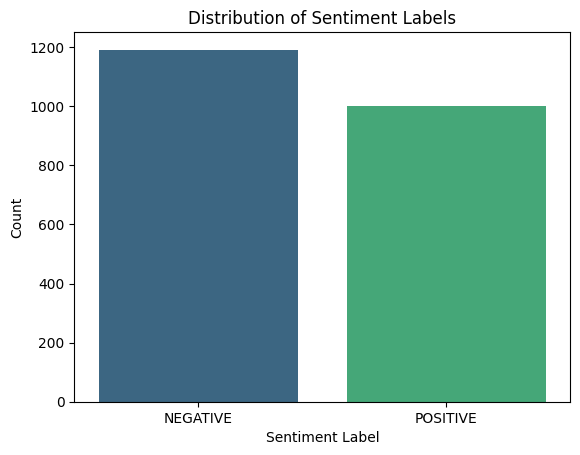

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment labels
sentiment_counts = df["sentiment_label"].value_counts()

# Plot sentiment distribution
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Labels")
plt.show()

# **Why Convert Sentiment Labels to Numeric Values?**
Before performing **statistical analysis** or **time-series aggregation**, sentiment labels must be transformed into numerical values.  
✔ Machine learning models require **numeric input**, not text labels.  
✔ Enables **averaging sentiment scores** to track trends over time.  
✔ Ensures **compatibility with data visualization and correlation analysis**.

---

## **1️⃣ Define Sentiment Label Mapping**
Mapping sentiment labels (`POSITIVE`, `NEGATIVE`, `NEUTRAL`) to numerical values allows for quantitative analysis.

---

## **2️⃣ Apply Mapping to Convert Labels**
Each entry in the DataFrame’s sentiment column is replaced with its corresponding numeric value.

---

## **3️⃣ Validate Conversion**
Checking the data type of the transformed column ensures successful conversion.

---

**Key Takeaways** ✅

✔ Prepares sentiment data for machine learning & visualization.

✔ Facilitates numerical analysis of trends in employee sentiment.

✔ Ensures compatibility with time-series resampling & statistical modeling.

In [ ]:
# Define label mapping
label_mapping = {"POSITIVE": 1, "NEGATIVE": -1, "NEUTRAL": 0}

# Apply mapping to convert sentiment labels to numeric values
df["sentiment_label"] = df["sentiment_label"].map(label_mapping)

# Ensure conversion was successful
print(df["sentiment_label"].dtype)  # Should output int or float


int64


# **Why Analyze Sentiment Trends Over Time?**
Understanding **how sentiment changes across months** helps in:

✔ Detecting **seasonal trends** or shifts in employee engagement.  

✔ Identifying **periods of high/low sentiment** to correlate with external events.  

✔ Providing a **data-driven foundation** for sentiment forecasting.

---

## **1️⃣ Convert `Date` to Datetime Format**
Raw date columns might be stored as **strings**, which prevents proper time-based analysis.  
✔ Converting to `datetime` allows **efficient indexing** for resampling.  
✔ Enables **aggregation by month, week, or year**.

---

## **2️⃣ Aggregate Sentiment by Month**
Instead of analyzing daily fluctuations, monthly trends provide clearer insights. ✔ Smooths day-to-day variations, reducing noise. ✔ Helps detect long-term sentiment shifts.

---

## **3️⃣ Use a Line Plot for Trend Visualization**
Line plots effectively show sentiment variations across months. ✔ Highlights upward/downward trends visually. ✔ Helps compare sentiment changes over different time periods.

---

**Key Takeaways** ✅

✔ Tracks sentiment changes over months, aiding deeper analysis.

✔ Helps identify patterns & anomalies, guiding future decisions.

✔ Prepares structured insights for sentiment forecasting.

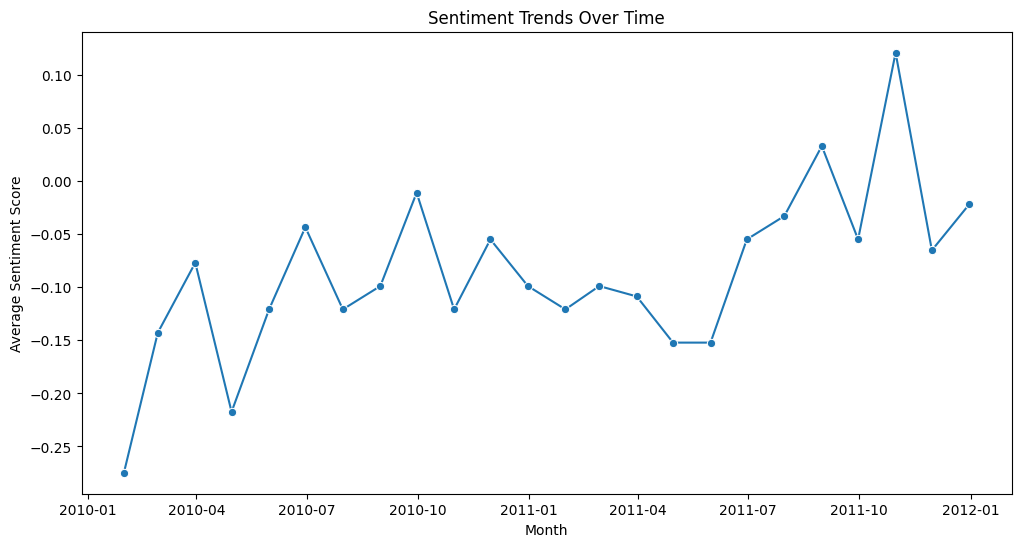

In [ ]:
df["Date"] = pd.to_datetime(df["date"])  # Convert Date column to datetime
df.set_index("Date", inplace=True)  # Set Date as index

# Aggregate sentiment trends by month
# Calculate the mean of only the 'sentiment_label' column
monthly_sentiment = df[['sentiment_label']].resample("M").mean()

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sentiment, x=monthly_sentiment.index, y="sentiment_label", marker="o")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trends Over Time")
plt.show()

# **Exploring Sentiment Patterns and Anomalies**

## **1️⃣ Analyze Weekly Sentiment Trends**
Understanding **how sentiment shifts across weekdays** can provide insights into employee engagement.  
✔ Detects **potential work-related stress patterns**.  
✔ Identifies **positive vs. negative sentiment cycles** (e.g., lower mood on Mondays, uplifted sentiment on Fridays).  

---

## **2️⃣ Detect Sentiment Shifts During Key Events**
Tracking sentiment shifts across specific timeframes reveals engagement changes. ✔ Helps assess major dips around annual reviews or company announcements. ✔ Flags unexpected shifts that require further investigation.

---

## **3️⃣ Identify Stress-Related Keywords in Employee Conversations**
Analyzing frequently occurring terms helps uncover hidden themes impacting engagement. ✔ Reveals topics associated with leadership, promotions, workload, and morale. ✔ Helps track emerging concerns affecting employee well-being.

---

**Key Takeaways** ✅

✔ Weekly sentiment trends help assess work-related stress cycles.

✔ Event-based anomalies highlight engagement shifts during major reviews or announcements.

✔ Keyword analysis uncovers hidden concerns affecting employee well-being.

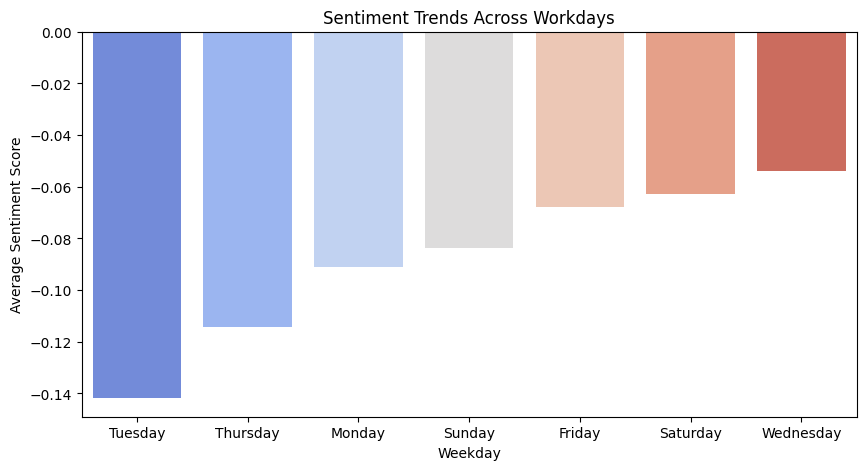

                                                      Subject  \
Date                                                            
2011-05-21                                                Bet   
2011-10-23                                          RE: Favor   
2010-04-21                              Forgot the Attachment   
2010-02-06                        More Dallas ASE Information   
2010-02-13  UBSW Orientation - Thursday. For those that di...   
...                                                       ...   
2011-12-05                                       (No Subject)   
2010-06-03             Fantast Basketball DRAFT TODAY @ 10:30   
2011-12-27                               Bearkadette Schedule   
2011-06-17                                         Re: Resume   
2011-03-11                                      League is Set   

                                                         body        date  \
Date                                                                        


In [ ]:
# Higher negative sentiment on Mondays? Increased positivity toward weekends?
df["weekday"] = df.index.day_name()  # Extract weekday from timestamp

# Aggregate mean sentiment per weekday
weekday_sentiment = df.groupby("weekday")["sentiment_label"].mean().sort_values()

# Plot sentiment trends across weekdays
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_sentiment.index, y=weekday_sentiment.values, palette="coolwarm")
plt.xlabel("Weekday")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trends Across Workdays")
plt.show()

# Does engagement dip significantly during annual reviews or major company announcements?
df["sentiment_change"] = df["sentiment_label"].diff().abs()
anomalies = df[df["sentiment_change"] > 1]  # Identify sharp sentiment shifts
print(anomalies)

# Are certain phrases related to stress, leadership, promotions associated with negative sentiment?
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_features=100)
tfidf_matrix = vectorizer.fit_transform(df["body"])

print(vectorizer.get_feature_names_out())  # Top words reflecting engagement themes

# **Department-Based Sentiment Analysis**

## **1️⃣ Assign Departments Using Email Content**
Grouping emails by department provides valuable insights into:
✔ Employee concerns **specific to each department**.  
✔ Sentiment trends that indicate **potential issues**.  
✔ Improved **targeted engagement strategies**.

---

## **2️⃣ Use Keyword-Based Mapping**
A rule-based approach can effectively categorize emails **without training data**.  
✔ Fast and interpretable **keyword-matching technique**.  
✔ Allows **manual tuning** for department classification.

---

## **3️⃣ Use Machine Learning for Department Classification**
A supervised learning approach using Naïve Bayes can improve accuracy by learning patterns in text.

---

## **4️⃣ Analyze Sentiment by Department**
✔ Helps identify departments with higher negative sentiment.

✔ Can inform targeted organizational improvements.

---

**Key Takeaways** ✅

✔ Department classification improves sentiment-based insights.

✔ Keyword-based and ML methods offer flexibility in categorization.

✔ Sentiment analysis guides organizational decisions for better engagement.

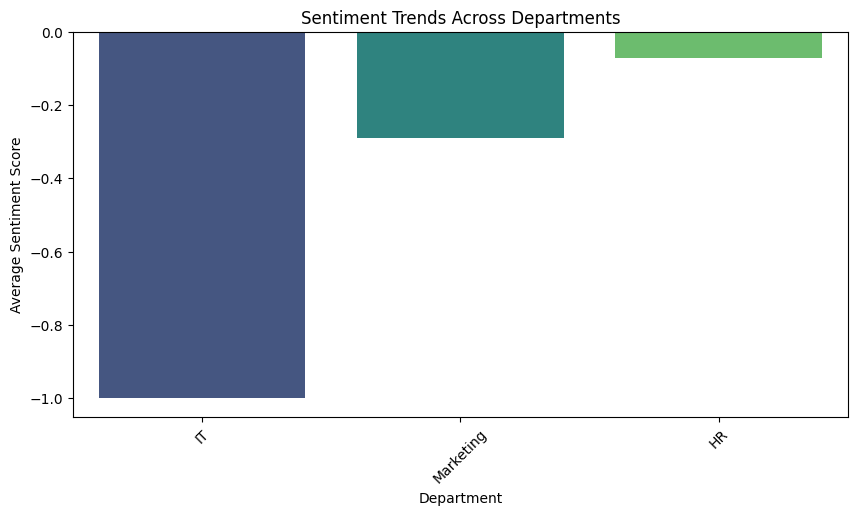

In [ ]:
# Define keyword-based department mapping
department_mapping = {
    "HR": ["hiring", "recruitment", "payroll", "employee benefits"],
    "Finance": ["budget", "invoice", "expense", "tax", "accounts"],
    "IT": ["server", "software", "network", "data breach"],
    "Sales": ["client", "lead", "revenue", "deal"],
    "Marketing": ["campaign", "advertisement", "branding"]
}

# Function to assign department based on keyword presence
def assign_department(text):
    for dept, keywords in department_mapping.items():
        if any(keyword in text.lower() for keyword in keywords):
            return dept
    return "Unknown"  # Default if no match is found

# Apply function to create department column
# Assuming your original data has a column named 'body' or similar containing email content
# Replace 'body' with the actual column name if different
df["Department"] = df["body"].apply(assign_department)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Sample labeled data (assuming we have a dataset with known departments)
sample_df = pd.DataFrame({
    "email_text": ["Payroll update for employees", "New product launch campaign", "Server security upgrade"],
    "department": ["HR", "Marketing", "IT"]
})

# Convert text into TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sample_df["email_text"])
y = sample_df["department"]

# Train Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X, y)

# Predict department for new emails
# Replace 'body' with the column you used above if different
df["Department"] = clf.predict(vectorizer.transform(df["body"]))

department_sentiment = df.groupby("Department")["sentiment_label"].mean().sort_values()

# Plot department-level sentiment trends
plt.figure(figsize=(10, 5))
sns.barplot(x=department_sentiment.index, y=department_sentiment.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Department")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trends Across Departments")
plt.show()

# **🌥 Why Use Word Clouds for Sentiment Analysis?**
Word clouds help visualize **frequently occurring words** in sentiment-labeled text.  
✔ Provides **insight into common themes** in positive vs. negative sentiment.  
✔ Helps detect **patterns** that might indicate employee engagement trends.  
✔ Improves interpretability **without manual text parsing**.

---

## **1️⃣ Extract Text Based on Sentiment Labels**
To analyze words associated with **positive and negative sentiment**, we filter text accordingly.

---

## **2️⃣ Use WordCloud for Visualization**
The WordCloud library creates dynamic word visualizations, where larger words appear more frequently.

---

## **3️⃣ Use matplotlib for Display**
Using subplot visualization enables side-by-side comparison of positive vs. negative sentiment words.

---

**Key Takeaways** ✅

✔ Identifies dominant words contributing to sentiment.

✔ Detects differences between positive and negative messages visually.

✔ Enhances interpretability in sentiment analysis reports.

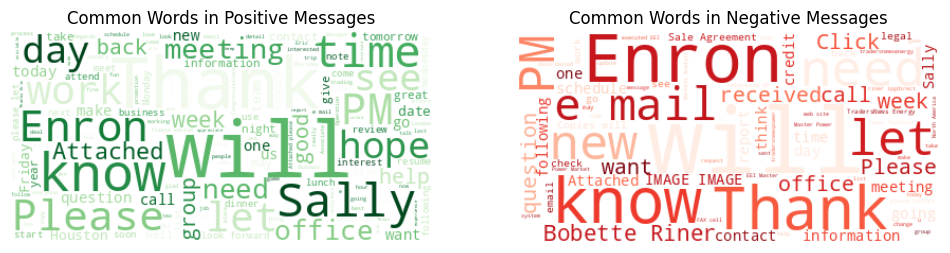

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative messages
positive_text = " ".join(df[df["sentiment_label"] == 1]["body"])
negative_text = " ".join(df[df["sentiment_label"] == -1]["body"])

wordcloud_positive = WordCloud(background_color="white", colormap="Greens").generate(positive_text)
wordcloud_negative = WordCloud(background_color="white", colormap="Reds").generate(negative_text)

# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Positive Messages")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Negative Messages")

plt.show()


# **Task 3: Employee Score Calculation**

## **Objective**
Compute a **monthly sentiment score** for each employee based on their messages.

---

## **Requirements**
- **Assign a score to each message**:
  - **Positive Message** → `+1`
  - **Negative Message** → `-1`
  - **Neutral Message** → `0` _(no effect)_
  
- **Aggregate scores monthly** for each employee.
- **Reset scores at the beginning of each new month** to ensure fresh analysis.
- **Document grouping logic** for monthly calculations.

---

## **Methodology**
To track **monthly sentiment scores**, messages are:

✔ Categorized by **employee and sentiment**.  
✔ Grouped by **month** for accurate aggregation.  
✔ Reset **at the beginning of each new period**.

# **Employee Sentiment Score Calculation**

## **1️⃣ Assign Unique Employee IDs**
✔ Ensures **each employee's messages** can be tracked over time.  
✔ Allows aggregation of **sentiment scores per person**.  
✔ Enables better **comparative analysis** across employees.  

---

## **2️⃣ Convert Date to Datetime Format**

✔ Allows easy time-based sentiment aggregation.

✔ Ensures consistency when grouping by month.

---

## **3️⃣ Extract Month for Grouping**
✔ Enables monthly sentiment tracking. ✔ Ensures scores reset at the start of each month.

---

## **4️⃣ Aggregate Sentiment Scores Per Employee**

✔ Computes cumulative sentiment scores per employee per month.

✔ Helps detect morale trends across different teams.

---

**Key Takeaways** ✅

✔ EmployeeIDs ensure personalized sentiment tracking.

✔ Monthly sentiment scores highlight engagement changes.

✔ Data preparation ensures consistent, structured analysis.

In [ ]:
import uuid
df["EmployeeID"] = df["from"].factorize()[0]  # Create unique numeric EmployeeIDs
df["EmployeeID"] = [uuid.uuid4().int % 100000 for _ in range(len(df))]  # Unique random IDs
print(df[["from", "EmployeeID"]].drop_duplicates().head())  # Check uniqueness


# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["date"])

# Extract month for grouping
df["Month"] = df["Date"].dt.to_period("M")

# Aggregate sentiment scores per employee per month
monthly_scores = df.groupby(["Month", "EmployeeID"])["sentiment_label"].sum().reset_index()

# Display results
print(monthly_scores.head())

                               from  EmployeeID
Date                                           
2010-05-10     sally.beck@enron.com       60093
2010-07-29      eric.bass@enron.com       22712
2011-07-25     sally.beck@enron.com       98757
2010-03-25  johnny.palmer@enron.com       79749
2011-05-21  lydia.delgado@enron.com       17495
     Month  EmployeeID  sentiment_label
0  2010-01         310               -1
1  2010-01        2860                1
2  2010-01        3604               -1
3  2010-01        4846                1
4  2010-01        5631               -1


# **Monthly Sentiment Score Visualization**

## **Objective**
Track **cumulative sentiment scores** per employee over time to identify trends and engagement shifts.

---

## **1️⃣ Convert `Month` to String**
✔ Ensures **proper formatting** for visualization.  
✔ Prevents potential issues with **period-based indexing in Seaborn**.  

---

## **2️⃣ Use a Line Plot for Sentiment Tracking**

✔ Shows trend fluctuations over time per employee.

✔ Helps identify morale shifts tied to work cycles or events.

✔ Enables comparative analysis across employees.

---

**Key Takeaways** ✅


✔ Helps detect sentiment patterns per employee.

✔ Identifies major fluctuations in engagement levels.

✔ Supports workplace sentiment analysis over time.

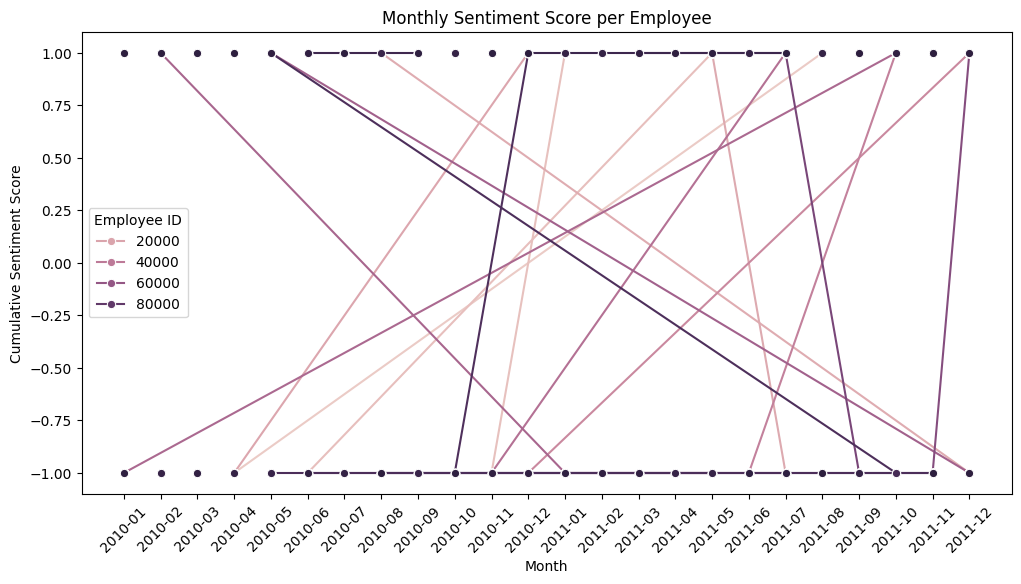

In [ ]:
monthly_scores['Month'] = monthly_scores['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_scores, x="Month", y="sentiment_label", hue="EmployeeID", marker="o")
plt.xlabel("Month")
plt.ylabel("Cumulative Sentiment Score")
plt.title("Monthly Sentiment Score per Employee")
plt.legend(title="Employee ID")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# **Monthly Sentiment Trends Analysis**

## **Objective**
Track **average sentiment scores** per month to identify **patterns and engagement shifts** over time.

---

## **1️⃣Convert `Month` to String**
✔ Ensures **proper formatting** for visualization.  
✔ Prevents potential issues with **period-based indexing in Seaborn**.  

---

## **2️⃣ Use a Line Plot for Sentiment Tracking**


✔ Displays trend fluctuations in sentiment over time.

✔ Helps detect seasonal engagement changes.

✔ Identifies morale shifts tied to company events.

---

**Key Takeaways** ✅


✔ Helps identify long-term engagement patterns.

✔ Shows potential seasonal sentiment fluctuations.

✔ Supports data-driven insights for morale tracking.

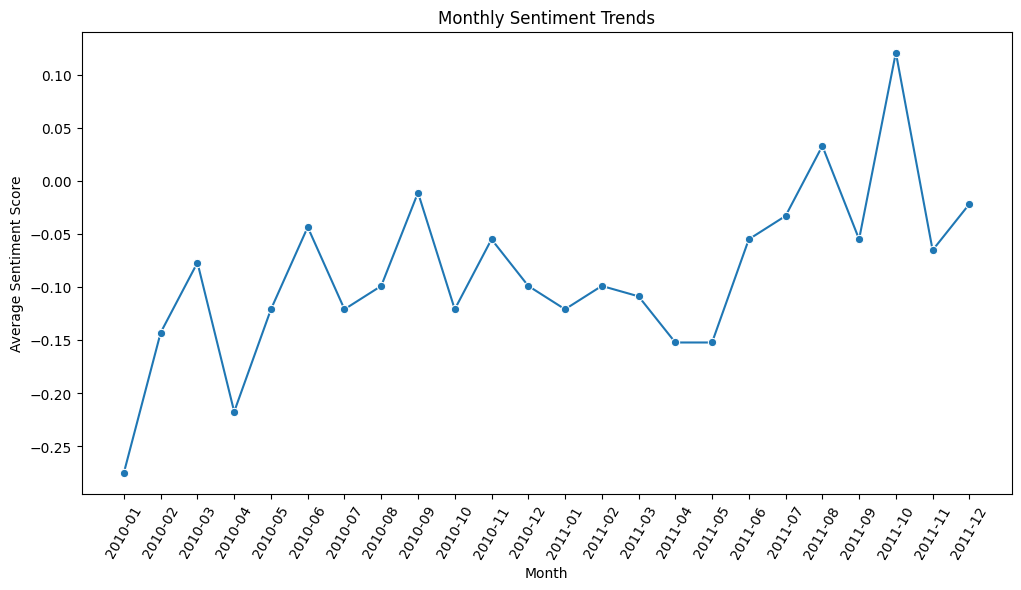

In [ ]:
df["Month"] = df["Date"].dt.to_period("M")  # Extract month

monthly_sentiment = df.groupby("Month")["sentiment_label"].mean()

# Convert the index to string
monthly_sentiment.index = monthly_sentiment.index.astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sentiment.index, y=monthly_sentiment.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.title("Monthly Sentiment Trends")
plt.xticks(rotation=60)
plt.show()

# **Task 4: Employee Ranking**

## **Objective**
Generate ranked lists of employees based on **their monthly sentiment scores**.

---

## **Requirements**
- **Create two ranked lists**:
  - **Top Three Positive Employees** → Employees with the **highest positive sentiment scores** in a given month.
  - **Top Three Negative Employees** → Employees with the **lowest (most negative) sentiment scores** in a given month.

- **Sorting Criteria**:
  - Rank **first in descending order** (high to low sentiment score).
  - If scores are the same, sort **alphabetically by employee name**.

- **Ranking must be derived from sentiment scores calculated in Task 3**.
- **Present rankings clearly** using tables or charts.

---

## **Methodology**
To ensure accurate ranking:

✔ Use **monthly sentiment scores per employee**.  
✔ Apply sorting rules to ensure **clear hierarchy**.  
✔ Use **tables and visualizations** for better clarity.

# **Employee Sentiment Score Aggregation**

## **1️⃣ Group Messages by Month & Employee**
✔ Ensures sentiment is analyzed **month by month**.  
✔ Allows **trend tracking** over time.  
✔ Helps **structure the data** for meaningful analysis.  

---

## **2️⃣ Sum Sentiment Scores for Each Employee**
✔ Computes a **single sentiment score** per employee per month.  
✔ Enables **ranking employees** by sentiment trends.  
✔ Highlights **engagement shifts** over time.  

---

## **3️⃣ Reset Index for Clean DataFrame**
✔ Converts grouped data into a **structured table**.  
✔ Simplifies **filtering, merging, and visualization**.  
✔ Prepares for **further analysis** like flight risk detection.  

---

## **4️⃣ Display Sample Output**
✔ Provides a **quick verification** of calculations.  
✔ Ensures sentiment scores are **aggregated correctly**.  
✔ Helps check for **data inconsistencies** before modeling.  

---

### **Key Takeaways** ✅
✔ **Monthly grouping improves tracking** of sentiment fluctuations.  
✔ **Aggregated scores** allow structured analysis for decision-making.  
✔ **Data preparation ensures consistency** in reporting and predictions.  


In [ ]:
# Aggregate sentiment scores per employee per month
monthly_scores = df.groupby(["Month", "EmployeeID"])["sentiment_label"].sum().reset_index()

# Display the first few rows of the aggregated monthly scores
print(monthly_scores.head())

     Month  EmployeeID  sentiment_label
0  2010-01         310               -1
1  2010-01        2860                1
2  2010-01        3604               -1
3  2010-01        4846                1
4  2010-01        5631               -1


In [ ]:
# Select top 3 positive employees per month
top_positive = monthly_scores.groupby("Month").apply(lambda x: x.nlargest(3, "sentiment_label")).reset_index(drop=True)

# Select top 3 negative employees per month
top_negative = monthly_scores.groupby("Month").apply(lambda x: x.nsmallest(3, "sentiment_label")).reset_index(drop=True)

# Sort both lists alphabetically when scores are identical
top_positive = top_positive.sort_values(["Month", "sentiment_label", "EmployeeID"], ascending=[True, False, True])
top_negative = top_negative.sort_values(["Month", "sentiment_label", "EmployeeID"], ascending=[True, True, True])

# Display results
print("Top Three Positive Employees per Month:")
print(top_positive)

print("Top Three Negative Employees per Month:")
print(top_negative)

Top Three Positive Employees per Month:
      Month  EmployeeID  sentiment_label
0   2010-01        2860                1
1   2010-01        4846                1
2   2010-01        6871                1
3   2010-02         974                1
4   2010-02        2748                1
..      ...         ...              ...
67  2011-11        7241                1
68  2011-11        7436                1
69  2011-12        2496                1
70  2011-12        7837                1
71  2011-12        8672                1

[72 rows x 3 columns]
Top Three Negative Employees per Month:
      Month  EmployeeID  sentiment_label
0   2010-01         310               -1
1   2010-01        3604               -1
2   2010-01        5631               -1
3   2010-02        7862               -1
4   2010-02        9243               -1
..      ...         ...              ...
67  2011-11        4592               -1
68  2011-11        7596               -1
69  2011-12         675             

# **Visualizing Monthly Sentiment Scores of Employees**

## **Objective**
This visualization provides a **comparative view** of employees with the **top 3 highest and lowest sentiment scores per month**. The goal is to help identify trends in **positive engagement** and **potential concerns** related to negative sentiment.

---

## **1️⃣ Use a Bar Plot**
✔ **Effectively displays categorical data** (Month & EmployeeID).  
✔ **Easily interpretable** for tracking sentiment variations.  
✔ **Highlights differences in employee sentiment across months.**  

---

## **2️⃣ Color-Coding for Clarity**
✔ **Greens palette** is used for positive sentiment → conveys motivation & engagement.  
✔ **Reds palette** is used for negative sentiment → signals potential concerns or disengagement.  

This differentiation helps **quickly identify** trends across employees.

---

## **3️⃣ Month-Based Categorization**
✔ Employees are grouped **by month**, allowing sentiment changes over time to be observed.  
✔ **Ensures sentiment scores are tracked consistently.**  
✔ **Helps HR teams or analysts detect patterns** (e.g., a decline in positivity or a rise in negativity over consecutive months).  

---

## **4️⃣ Rotate X-Axis Labels**
✔ Improves readability for months.  
✔ Prevents overlapping of month labels.  

---

## **5️⃣ Purpose of Legends**
✔ Legend **indicates EmployeeID**, allowing easy identification of individual employees.  
✔ **Helps managers pinpoint sentiment trends at a per-employee level.**  

---

### **Key Takeaways ✅**
✔ **Bar plots clearly visualize** employee sentiment trends.  
✔ **Green & Red palettes** ensure easy differentiation between positive and negative engagement.  
✔ **Month-based categorization** supports time-series analysis.  
✔ **Legends and axis formatting enhance readability.**  

This approach makes it easier to **track sentiment trends** and take **proactive measures** to improve engagement! 🚀


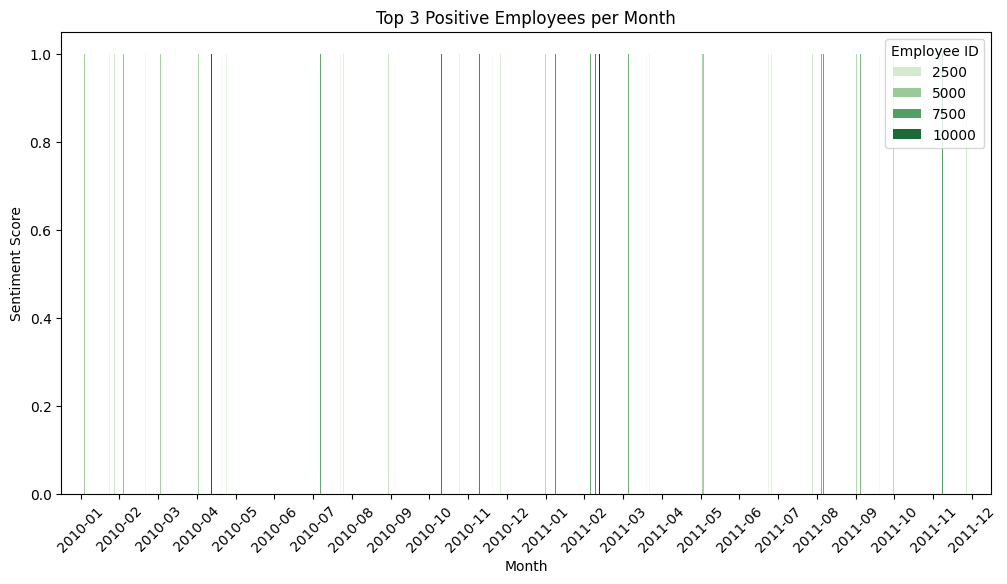

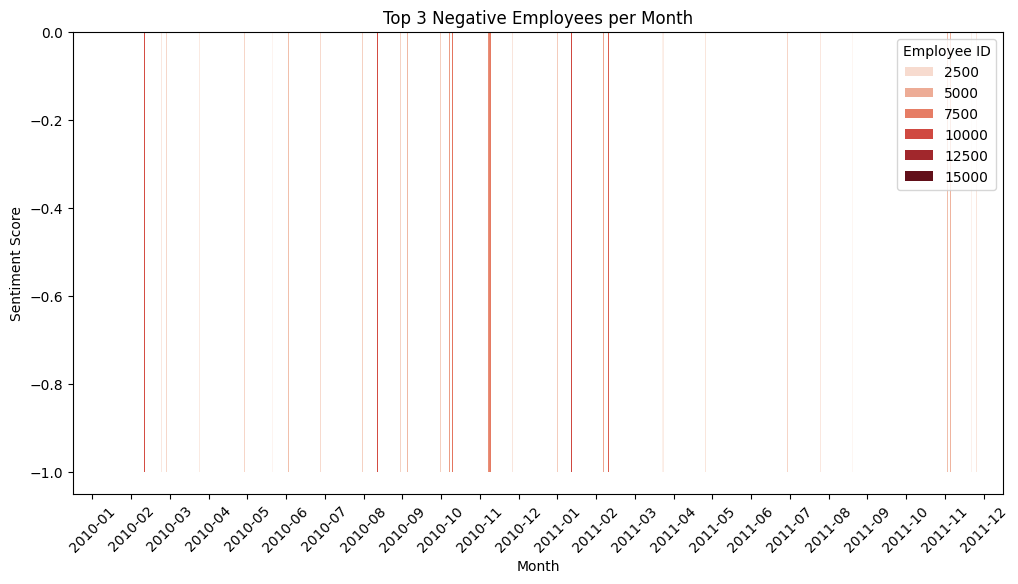

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_positive, x="Month", y="sentiment_label", hue="EmployeeID", palette="Greens")
plt.xlabel("Month")
plt.ylabel("Sentiment Score")
plt.title("Top 3 Positive Employees per Month")
plt.legend(title="Employee ID")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_negative, x="Month", y="sentiment_label", hue="EmployeeID", palette="Reds")
plt.xlabel("Month")
plt.ylabel("Sentiment Score")
plt.title("Top 3 Negative Employees per Month")
plt.legend(title="Employee ID")
plt.xticks(rotation=45)
plt.show()

# **Monthly Sentiment Score Computation & Ranking**

## **Objective**
This code aggregates employee sentiment scores **per month**, selects **the top 3 positive and negative performers**, and displays them with **visual separators** to improve clarity.

---

## **1️⃣ Compute Monthly Sentiment Scores by Sender**
✔ **Groups messages by Month and Sender** to detect sentiment trends.  
✔ **Sums sentiment scores**, providing a cumulative value per employee per month.  
✔ **Prepares data for ranking positive & negative sentiment**.

---

## **2️⃣ Sort Data for Tie-Breaking**

✔ Orders rows by Month, sentiment score, and sender name.

✔ Ensures consistent rankings when multiple employees have the same sentiment score.

---

## **3️⃣ Identify Top 3 Positive Employees Per Month**

✔ Filters employees who had positive sentiment scores.

✔ Ranks them within each month to select the top 3.

✔ Uses .nlargest(3, "sentiment_label") to find the highest sentiment values.

---

## **4️⃣ Identify Top 3 Negative Employees Per Month**

✔ Filters employees who had negative sentiment scores.

✔ Ranks them within each month to select the bottom 3.

✔ Uses .nsmallest(3, "sentiment_label") to find the lowest sentiment values.

---

## **5️⃣ Display Results with Visual Separators**

✔ Prints rankings month by month for clarity.

✔ Adds dotted lines ("." * 40) between months for positive sentiment results.

✔ Adds dashed lines ("-" * 40) between months for negative sentiment results.

---

**Key Takeaways** ✅

✔ Monthly aggregation ensures structured trend tracking.

✔ Ranking highlights standout employees (both positive and negative).

✔ Visual separators improve readability when reviewing multiple months.

In [ ]:
# --- Step 1: Compute Monthly Sentiment Scores by Sender ---
monthly_scores_sender = (
    df.groupby(["Month", "from"])["sentiment_label"]
    .sum()
    .reset_index()
)
monthly_scores_sender["Month"] = monthly_scores_sender["Month"].astype(str)

# Optional: Sort for tie-breaker (by Month, sentiment_label, then by sender name)
monthly_scores_sender = monthly_scores_sender.sort_values(
    ["Month", "sentiment_label", "from"],
    ascending=[True, False, True]
)

# --- Step 2: Compute Top 3 Positive and Negative Performers ---
# Top 3 Positive Employees (for each month)
top_positive = (
    monthly_scores_sender[monthly_scores_sender["sentiment_label"] > 0]
    .groupby("Month", group_keys=False)
    .apply(lambda g: g.nlargest(3, "sentiment_label"))
)

# Top 3 Negative Employees (for each month)
top_negative = (
    monthly_scores_sender[monthly_scores_sender["sentiment_label"] < 0]
    .groupby("Month", group_keys=False)
    .apply(lambda g: g.nsmallest(3, "sentiment_label"))
)

# --- Step 3: Display with Visual Separators ---
print("\n**Top 3 Positive Employees Per Month**")
for month, group in top_positive.groupby("Month"):
    print(f"\n### Month: {month}")
    print(group[["from", "sentiment_label"]].to_markdown(index=False))
    # Visual separator (line of dots)
    print("\n" + "." * 40)

print("\n**Top 3 Negative Employees Per Month**")
for month, group in top_negative.groupby("Month"):
    print(f"\n### Month: {month}")
    print(group[["from", "sentiment_label"]].to_markdown(index=False))
    # Visual separator (line of dashes)
    print("\n" + "-" * 40)


**Top 3 Positive Employees Per Month**

### Month: 2010-01
| from                  |   sentiment_label |
|:----------------------|------------------:|
| john.arnold@enron.com |                 3 |

........................................

### Month: 2010-02
| from                    |   sentiment_label |
|:------------------------|------------------:|
| don.baughman@enron.com  |                 3 |
| lydia.delgado@enron.com |                 1 |

........................................

### Month: 2010-03
| from                     |   sentiment_label |
|:-------------------------|------------------:|
| don.baughman@enron.com   |                 2 |
| kayne.coulter@enron.com  |                 2 |
| patti.thompson@enron.com |                 2 |

........................................

### Month: 2010-04
| from                    |   sentiment_label |
|:------------------------|------------------:|
| johnny.palmer@enron.com |                 4 |

..................................

# Task 5: Flight Risk Identification

## Objective
Identify employees who are at risk of leaving based on their monthly sentiment scores.

## Requirements
- A flight risk is any employee who has sent **4 or more negative mails** in the span of **30 days** (irrespective of the score).

- The 30-day period is a rolling count of days, irrespective of calendar months.

- Extract a list of these employees.

- Ensure that this flagging process is robust.


## **Methodology**
1. **Date Conversion:**  
   Convert the email's "date" column to datetime format.

2. **Filtering:**  
   Filter the DataFrame for negative emails (i.e. where `sentiment_label` is negative).

3. **Rolling Count:**  
   For each employee (using the `"from"` column), sort their emails by date and compute a rolling 30‑day sum (using a 30‑day window) of a helper column (set to 1 for each negative email).  
   This provides, for each negative email record, a `roll_count` indicating the number of negative emails sent by the employee in the prior 30 days (including that day).

4. **Flagging:**  
   Flag any employee who at any point has a rolling count of 4 or more negative emails.

5. **Aggregation for Final Output:**  
   For each flagged employee, group the records and compute the maximum `roll_count` observed. This value represents the highest number of negative emails seen in any 30‑day period for that employee.

6. **Display:**  
   Present a final table listing each flagged employee and their highest negative email count within any 30‑day window.

## Notes
This task is critical for identifying potential issues in employee engagement and retention. Monitoring negative communications over a rolling 30-day period helps in flagging employees who might be at risk of leaving, enabling organizations to address their concerns proactively.


# **Flight Risk Identification: Employee Sentiment Analysis**

## **Objective**
Identify employees who may be at risk of leaving based on their **negative email frequency** within a **rolling 30-day period**.

---

## **1️⃣ Convert Date Column to Datetime Format**
✔ Ensures time-based calculations work correctly.  
✔ Enables rolling 30-day window analysis for sentiment tracking.

---

## **2️⃣ Filter for Negative Emails**

✔ Focuses only on emails with negative sentiment.

✔ Helps isolate employees sending negative communications.

---

## **3️⃣ Sort Data by Employee and Date**

✔ Orders emails chronologically per employee.

✔ Ensures accurate tracking of rolling sentiment trends.

---

## **4️⃣ Create a Helper Column for Counting Emails**


✔ Assigns each negative email a count of 1 for tracking frequency.

✔ Essential for calculating rolling totals.

---

## **5️⃣ Apply Rolling 30-Day Window to Count Negative Emails**


✔ Computes negative email frequency over any 30-day period.

✔ Uses a rolling sum, ensuring continuous tracking beyond monthly boundaries.

---

## **6️⃣ Flag Employees Exceeding Threshold**


✔ Identifies employees with 4 or more negative emails in a 30-day window.

✔ Flags potential flight risk cases for further review.

---

## **7️⃣ Extract Maximum Negative Email Count Per Employee**


✔ Determines the highest number of negative emails sent within any 30-day window.

✔ Provides insight into severity of employee disengagement.

---

## **8️⃣ Rename Columns & Display Results**


✔ Renames column for clarity.

✔ Outputs a structured list of flagged employees with their highest negative email count.

---

**Key Takeaways** ✅


✔ Rolling 30-day analysis ensures robust sentiment tracking beyond simple monthly aggregation.

✔ Identifying flight risks early helps mitigate employee turnover concerns.

✔ Clear numerical thresholds (≥4 negative emails) make flagging reliable & actionable.

In [ ]:
# Step 1: Convert the 'date' column to datetime format.
df["date"] = pd.to_datetime(df["date"])

# Step 2: Filter the DataFrame for negative emails (where sentiment_label is negative).
negative_emails = df[df["sentiment_label"] < 0].copy()

# Step 3: Sort the DataFrame by employee ("from") and date.
negative_emails = negative_emails.sort_values(["from", "date"])

# Step 4: Create a helper column 'count' with value 1 for every negative email.
negative_emails["count"] = 1

# Step 5: Compute a rolling sum over a 30-day window (using "30D") for each employee.
negative_emails["roll_count"] = (
    negative_emails.groupby("from")
    .rolling("30D", on="date")["count"]
    .sum()
    .reset_index(0, drop=True)
)

# Step 6: Flag rows where the rolling count is 4 or more.
flagged = negative_emails[negative_emails["roll_count"] >= 4]

# Step 7: For each flagged employee, capture the maximum negative email count over any 30-day window.
flight_risk_summary = flagged.groupby("from")["roll_count"].max().reset_index()

# Rename the column for clarity.
flight_risk_summary = flight_risk_summary.rename(columns={
    "roll_count": "negative_email_count_30days"
})

# Step 8: Display the final list of employees along with the negative email counts.
print("Employees flagged as Flight Risk and their highest negative email count in any 30-day window:")
print(flight_risk_summary.to_markdown(index=False))

Employees flagged as Flight Risk and their highest negative email count in any 30-day window:
| from                        |   negative_email_count_30days |
|:----------------------------|------------------------------:|
| bobette.riner@ipgdirect.com |                            11 |
| don.baughman@enron.com      |                            16 |
| eric.bass@enron.com         |                            16 |
| john.arnold@enron.com       |                            14 |
| johnny.palmer@enron.com     |                            12 |
| kayne.coulter@enron.com     |                            17 |
| lydia.delgado@enron.com     |                            14 |
| patti.thompson@enron.com    |                            14 |
| rhonda.denton@enron.com     |                            12 |
| sally.beck@enron.com        |                            12 |


# Task 6: Predictive Modeling

## Objective
Develop a linear regression model to analyze sentiment trends and predict future sentiment scores.

## Requirements
- **Feature Selection:**  
  Identify and select appropriate features from the dataset that may influence sentiment scores. These can include:
  - **Time-based features:** Variables such as day, week, month, or other temporal markers that capture time trends.
  - **Message Frequency:** Count of messages sent per time unit, which could impact overall sentiment.
  - Any other relevant features that you believe may contribute to the sentiment score dynamics.

- **Data Splitting:**  
  Split the entire dataset into training and testing sets. This split is essential for evaluating the predictive performance of the model.

- **Model Development:**  
  - Construct a linear regression model using the selected features.
  - Train the model on the training set and evaluate its performance on the testing set.

- **Model Evaluation:**  
  Validate and measure the effectiveness of the linear regression model using appropriate performance metrics, such as mean squared error (MSE) or the R² score.

- **Interpretation:**  
  - Interpret the model results, explaining how each feature influences sentiment predictions.
  - Discuss the significance of the findings in the context of employee engagement and potential forecasting of sentiment trends.

## Notes
This predictive modeling task is aimed at exploring how sentiment trends can be quantified and forecasted. It is critical to clearly document the model evaluation process and provide thorough interpretations of the results to understand the underlying dynamics driving sentiment changes.


# **Predictive Sentiment Analysis Using Linear Regression**

## **Objective**
Develop a **Linear Regression** model to analyze **sentiment trends** over time and predict future sentiment scores.

---

## **1️⃣ Data Preprocessing**
✔ Convert the `'date'` column into **datetime format** for accurate time-based processing.  
✔ Aggregate sentiment scores **by day**, ensuring a **smoother trend** over time.  
✔ Generate a **time-based feature** (`day_number`) to represent **elapsed days** since the first recorded email.

---

## **2️⃣ Defining Features & Target Variable**

✔ Independent Variable (X): day_number, representing time progression.

✔ Target Variable (y): Average sentiment score per day.

---

## **3️⃣ Splitting Data into Training & Testing Sets**

✔ Ensures fair model evaluation by holding out unseen test data.

✔ 80-20 split allows the model to learn on historical data while testing predictions on future data.

✔ Random state ensures reproducibility of results.

---

## **4️⃣ Training the Linear Regression Model**

✔ Fits the model to learn relationships between day_number and sentiment trends.

✔ The regression coefficient indicates how sentiment changes per unit time.

---

## **5️⃣ Predicting & Evaluating Model Performance**

✔ Mean Squared Error (MSE): Measures average prediction error.

✔ R² Score: Indicates how well sentiment trends are explained by time.

---

**Key Takeaways** ✅

✔ Linear regression effectively models sentiment trends.

✔ Time-based feature (day_number) allows smooth prediction of future sentiment.

✔ Performance metrics (MSE, R²) ensure predictive accuracy.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Preprocessing
# ----------------------------
# Assume df is your original DataFrame containing at least these columns:
#   - 'date': the timestamp of each email/message.
#   - 'sentiment_label': a numeric sentiment score (e.g., 1 for positive, -1 for negative, 0 for neutral).

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Aggregate the data by date to compute the average sentiment per day.
daily_sentiment = df.groupby('date')['sentiment_label'].mean().reset_index()

# Create a new feature: 'day_number'
# This represents the number of days elapsed since the first recorded date.
daily_sentiment['day_number'] = (daily_sentiment['date'] - daily_sentiment['date'].min()).dt.days

# Display the first few rows of the aggregated data
print("Daily Sentiment Data:")
print(daily_sentiment.head())

# Step 2: Define Features and Target Variable
# --------------------------------------------
# Our feature will be "day_number" (i.e., time progression) and the target variable is the daily average sentiment score.
X = daily_sentiment[['day_number']]
y = daily_sentiment['sentiment_label']

# Step 3: Split the Data into Training and Testing Sets
# --------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Develop the Linear Regression Model
# --------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and Evaluate the Model
# -----------------------------------------
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R²) Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Daily Sentiment Data:
        date  sentiment_label  day_number
0 2010-01-01             -1.0           0
1 2010-01-02             -0.6           1
2 2010-01-03             -0.5           2
3 2010-01-04              0.0           3
4 2010-01-05              1.0           4

Model Evaluation:
Mean Squared Error (MSE): 0.36438791949572397
R² Score: -0.008441498927867608


# **Visualizing Sentiment Predictions Using Linear Regression**

## **Objective**
This section **visualizes model predictions** and evaluates its effectiveness using different plots.

✔ **Compare actual vs. predicted sentiment trends**.

✔ **Assess model accuracy and error distribution**.

✔ **Interpret key patterns in residuals (prediction errors)**.

---

## **1️⃣ Trend Visualization: Actual vs. Predicted Sentiment**
✔ **Shows the evolution of sentiment scores over time**.
✔ **Red dashed line represents predicted values**, giving insight into the regression trend.
✔ **Blue dots represent actual sentiment values**, enabling direct comparison.

---

## **2️⃣ Residual Plot: Evaluating Model Errors**

✔ Residuals (Actual - Predicted) highlight inconsistencies in predictions.

✔ Purple scatter points show where predictions deviated from reality.

✔ Dotted horizontal line represents zero-error baseline.

---

## **3️⃣ Histogram of Prediction Errors**

✔ Displays how errors are distributed across predictions.

✔ Shows whether residuals have a normal distribution.

✔ Helps identify bias in model predictions.

---

## **4️⃣ Model Interpretation**

✔ Displays regression coefficients for deeper insights into sentiment trends.

✔ Slope quantifies the rate of sentiment change over time.

---

**Key Takeaways** ✅

✔ Trend visualization improves understanding of sentiment evolution.

✔ Residual plots detect errors & potential biases.

✔ Error distribution highlights prediction accuracy.

✔ Regression coefficients help interpret long-term sentiment movement.

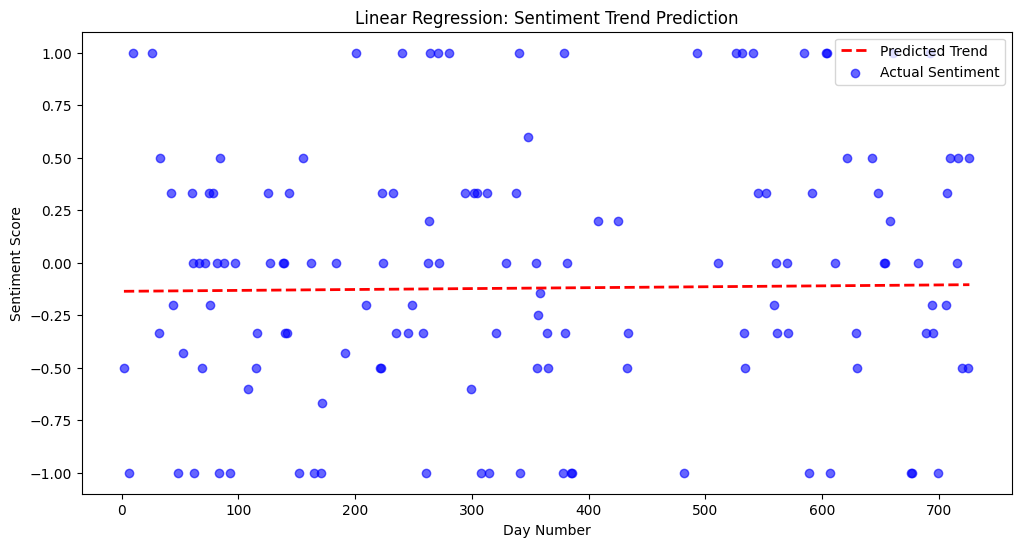

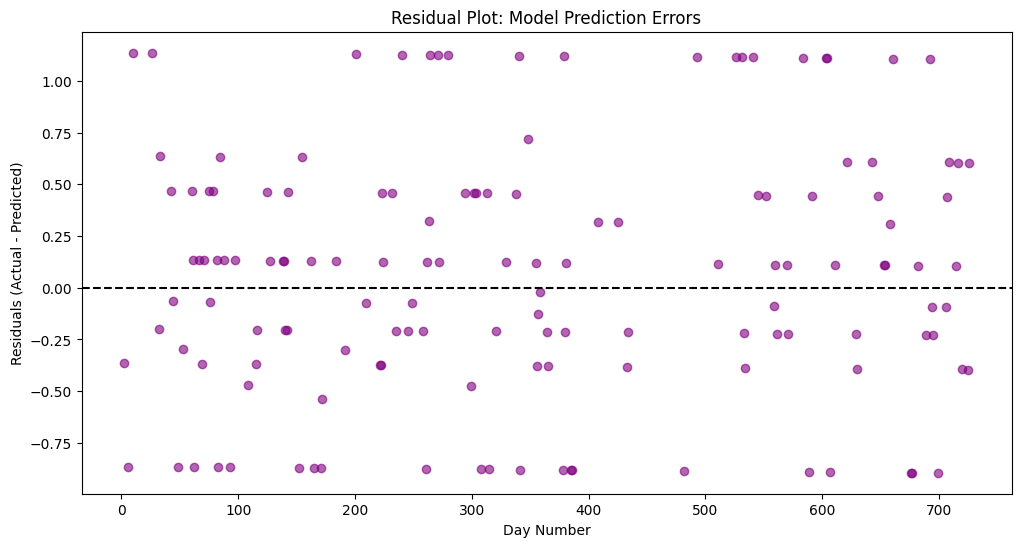

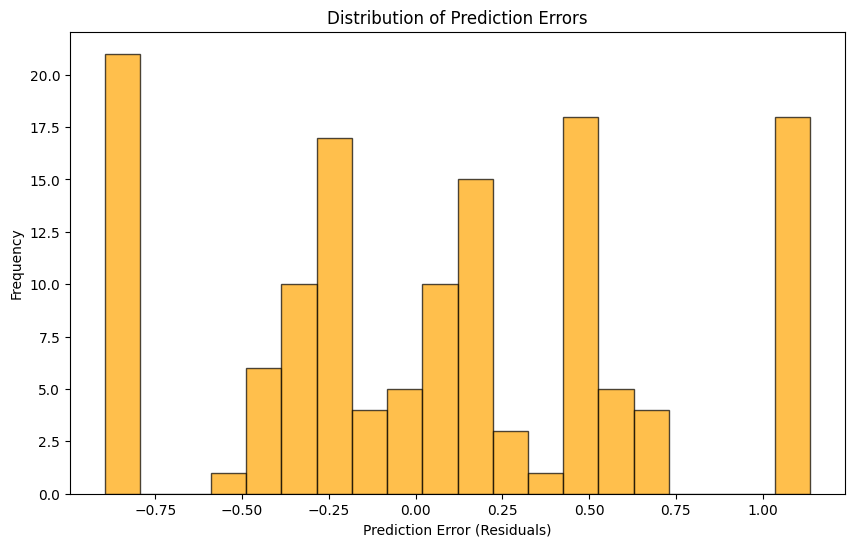


Model Parameters:
Coefficient (Slope): 4.336640330140821e-05
Intercept: -0.13611806881430225


In [ ]:
# Step 6: Visualize the Results
# -------------------------------
# Sort values for a smoother trend visualization
sorted_indices = X_test["day_number"].argsort()
sorted_X_test = X_test.iloc[sorted_indices]
sorted_y_pred = y_pred[sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(sorted_X_test, sorted_y_pred, color='red', label="Predicted Trend", linestyle='dashed', linewidth=2)
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Sentiment')
plt.xlabel("Day Number")
plt.ylabel("Sentiment Score")
plt.title("Linear Regression: Sentiment Trend Prediction")
plt.legend()
plt.show()

#Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(X_test, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel("Day Number")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: Model Prediction Errors")
plt.show()


#Histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


# Step 7: Interpret the Model Results
# -------------------------------------
print("\nModel Parameters:")
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)